In [35]:
import pandas as pd
import pandas as pd
import numpy as np
import math
import operator
import sys
import matplotlib.pyplot as plt
eps = np.finfo(float).eps
from numpy import log2 as log
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [36]:
df=pd.read_csv('Iris.csv')

In [37]:
# dividing the dataset into train and test
msk=np.random.rand(len(df)) < 0.5
train=df[msk]
test=df[~msk]

In [38]:
# finding the euclediandistance 
def euclediandistance(row1,row2,numberofattributes):
    distance=0
    for attribute in range(numberofattributes):
        distance+=pow(row1[attribute]-row2[attribute],2)
    distance=math.sqrt(distance)
    return distance
# euclediandistance([2,2,2,2,2],[1,1,4,4,3],4)

In [39]:
def findkneighbours(train,testrow,k):
    eucledianlist=[]
    for traininstance in range(len(train)):
        edistance=euclediandistance(train.iloc[traininstance],testrow,len(testrow)-1)
        eucledianlist.append((edistance,train.iloc[traininstance][-1]))
#     neighbourwithdistance=[]
#     neighbourwithdistane=findknearest(euclediandistance,k)
    eucledianlist=sorted(eucledianlist,key=operator.itemgetter(0))
    neighbour=[]
    for row in range(k):
        neighbour.append(eucledianlist[row][1])
    return neighbour

In [40]:
# findkneighbours(train,[2,2,2,2,"Iris-setosa"],5)

In [41]:
def predictinstance(neighbour):
    Setosa=0
    Versicolour=0
    Virginica=0
    for rows in range(len(neighbour)):
        if neighbour[rows] == "Iris-setosa" :
            Setosa=Setosa+1
        elif neighbour[rows] == "Iris-versicolor" :
            Versicolour=Versicolour+1
        elif neighbour[rows] == "Iris-virginica" :
            Virginica=Virginica+1
    if Setosa >= Versicolour and Setosa >= Virginica :
        return "Iris-setosa"
    elif Setosa <= Versicolour and Versicolour >= Virginica :
        return "Iris-versicolor"
    elif Virginica >= Versicolour and Setosa <= Virginica :
        return  "Iris-virginica"

In [42]:
def predictnew(train,test,k):
    predictlist=[]
    for i in range(len(test)):
        neighbour=findkneighbours(train,test.iloc[i],k)
        predictlist.append(predictinstance(neighbour))
#     print predictlist
    return accuracy_score(test['Class'],predictlist)

In [43]:
def predict(train,test,k):
    predictlist=[]
    for i in range(len(test)):
        neighbour=findkneighbours(train,test.iloc[i],k)
        predictlist.append(predictinstance(neighbour))
#     print predictlist
    print "The below details are from model developed:-"
    print "Accuracy score:-"
    print accuracy_score(test['Class'],predictlist)
    print "Confusion Matrix:-"
    print confusion_matrix(test['Class'],predictlist)
    print "Classification Report:-"
    print classification_report(test['Class'],predictlist)
    accuracy=[]
    for i in range(1, 50):
        p=predictnew(train,test,i)
        accuracy.append(p)    
    plt.plot(range(1, 50), accuracy)
    plt.title('Accuracy vs K Value')  
    plt.xlabel('K Value')
    plt.grid(True)
    plt.ylabel('Accuracy')
# print test['Class']    

The below details are from model developed:-
Accuracy score:-
0.9838709677419355
Confusion Matrix:-
[[16  0  0]
 [ 0 19  1]
 [ 0  0 26]]
Classification Report:-
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.96      1.00      0.98        26

      micro avg       0.98      0.98      0.98        62
      macro avg       0.99      0.98      0.99        62
   weighted avg       0.98      0.98      0.98        62



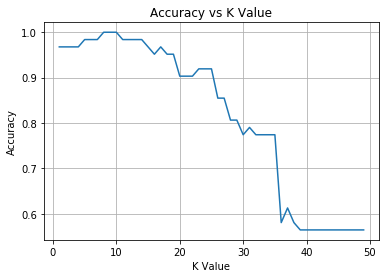

In [44]:
predict(train,test,5)

In [45]:
#sklearn inbuilt K Neighbour classifier
from sklearn.neighbors import KNeighborsClassifier
Y_train=train['Class']
X_train=train.drop(['Class'],axis=1)
model = KNeighborsClassifier(n_neighbors=5)
# Train the model using the training sets
model.fit(X_train,Y_train)

Y_test=test['Class']
X_test=test.drop(['Class'],axis=1)
#Predict Output
predictlist= model.predict(X_test) # 0:Overcast, 2:Mild
print "The below details are from inbuilt sklearn:-"
print "Accuracy score:-"
print accuracy_score(Y_test,predictlist)
print "Confusion Matrix:-"
print confusion_matrix(Y_test,predictlist)
print "Classification Report:-"
print classification_report(Y_test,predictlist)

The below details are from inbuilt sklearn:-
Accuracy score:-
0.9838709677419355
Confusion Matrix:-
[[16  0  0]
 [ 0 19  1]
 [ 0  0 26]]
Classification Report:-
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.96      1.00      0.98        26

      micro avg       0.98      0.98      0.98        62
      macro avg       0.99      0.98      0.99        62
   weighted avg       0.98      0.98      0.98        62



In [ ]:
# for testing data against the sample data
filename=sys.argv[1]
df2=pd.read_csv(filename)
predict(train,df2,5)

The below details are from model developed:-
Accuracy score:-
0.9777777777777777
Confusion Matrix:-
[[44  0  0]
 [ 0 44  2]
 [ 0  1 44]]
Classification Report:-
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        44
Iris-versicolor       0.98      0.96      0.97        46
 Iris-virginica       0.96      0.98      0.97        45

      micro avg       0.98      0.98      0.98       135
      macro avg       0.98      0.98      0.98       135
   weighted avg       0.98      0.98      0.98       135

